In [1]:
# import the basic librries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default seaborn style for graphics

In [2]:
diabetes_data = pd.read_csv('/work/diabetes.csv')
diabetes_data.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Data type : ", type(diabetes_data))
print("Data dims : ", diabetes_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (768, 9)


In [4]:
print(diabetes_data.dtypes) 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [5]:
# find out about variables
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# extracting numerical variables
numeric_data = pd.DataFrame(diabetes_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]])

# summary statistics for all Variables
numeric_data.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [7]:
# cleaning of data : remove rows where 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' is 0
cleannumeric_data = numeric_data[(numeric_data['Glucose'] != 0) & 
                            (numeric_data['BloodPressure'] != 0) & 
                            (numeric_data['SkinThickness'] != 0) & 
                            (numeric_data['Insulin'] != 0) & 
                            (numeric_data['BMI'] != 0)]

cleannumeric_data.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,3.30,122.63,70.66,29.15,156.06,33.09,0.52,30.86,0.33
std,3.21,30.86,12.50,10.52,118.84,7.03,0.35,10.20,0.47
min,0.00,56.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,62.00,21.00,76.75,28.40,0.27,23.00,0.00
50%,2.00,119.00,70.00,29.00,125.50,33.20,0.45,27.00,0.00
75%,5.00,143.00,78.00,37.00,190.00,37.10,0.69,36.00,1.00
max,17.00,198.00,110.00,63.00,846.00,67.10,2.42,81.00,1.00


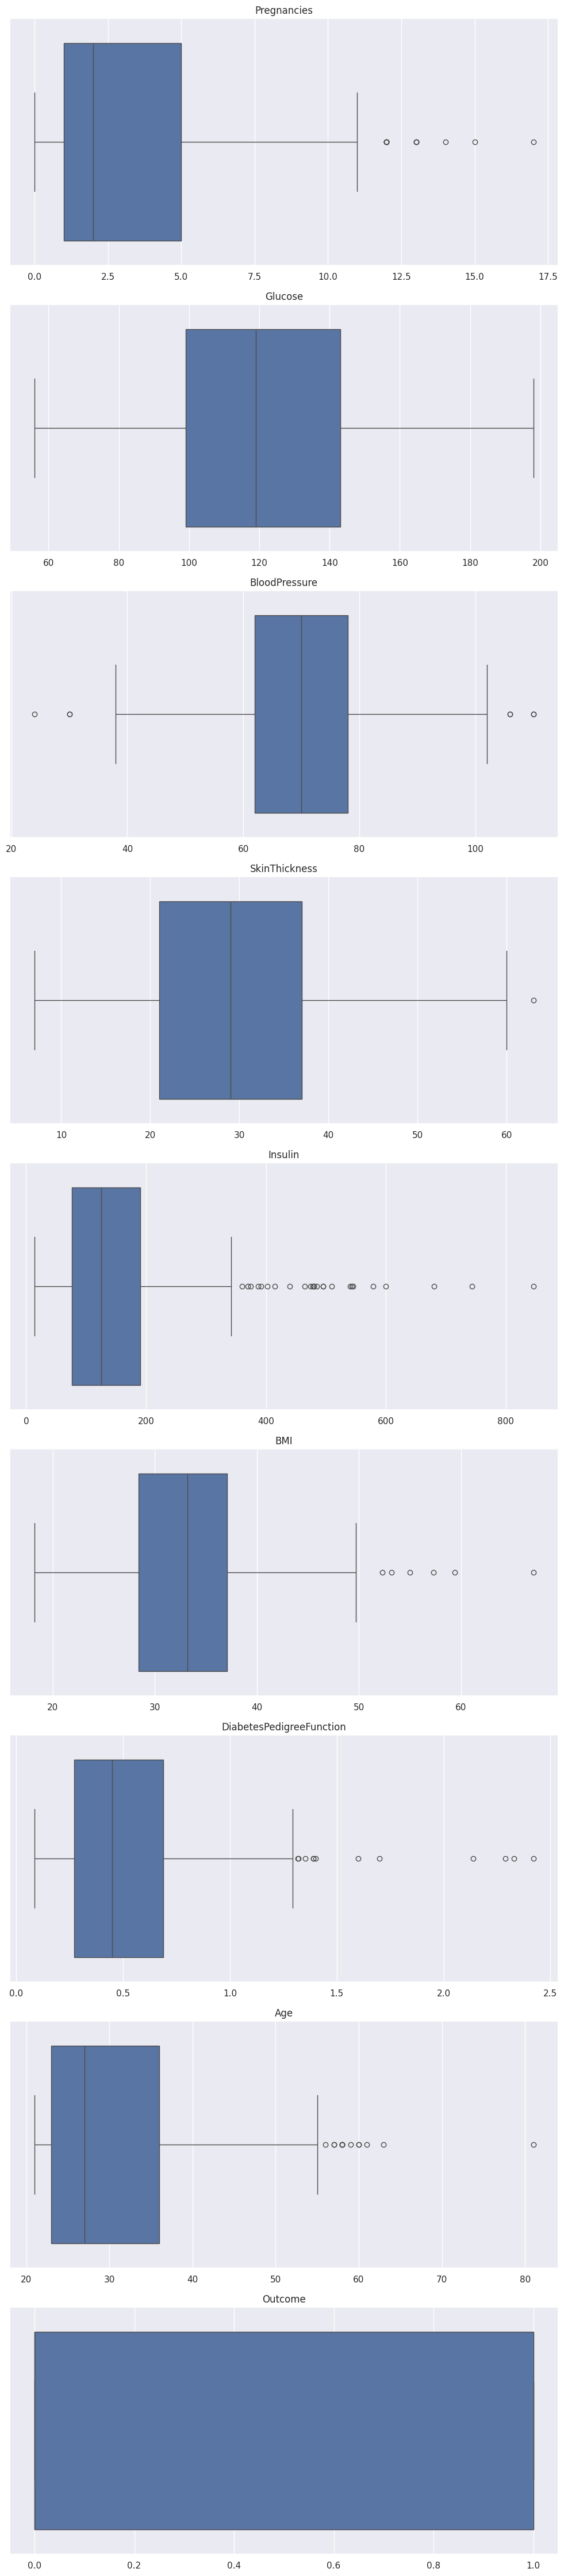

In [8]:
# visualise summary statistics by drawing boxplots of variables
variables = cleannumeric_data.columns  
n_vars = len(variables)  
fig, axs = plt.subplots(n_vars, 1, figsize=(10, 5 * n_vars))

for i, var in enumerate(variables):
    sb.boxplot(x=cleannumeric_data[var], ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_xlabel('') 

plt.tight_layout()
plt.show()

In [9]:
# calculate the complete  correlation matrix
cleannumeric_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


<AxesSubplot: >

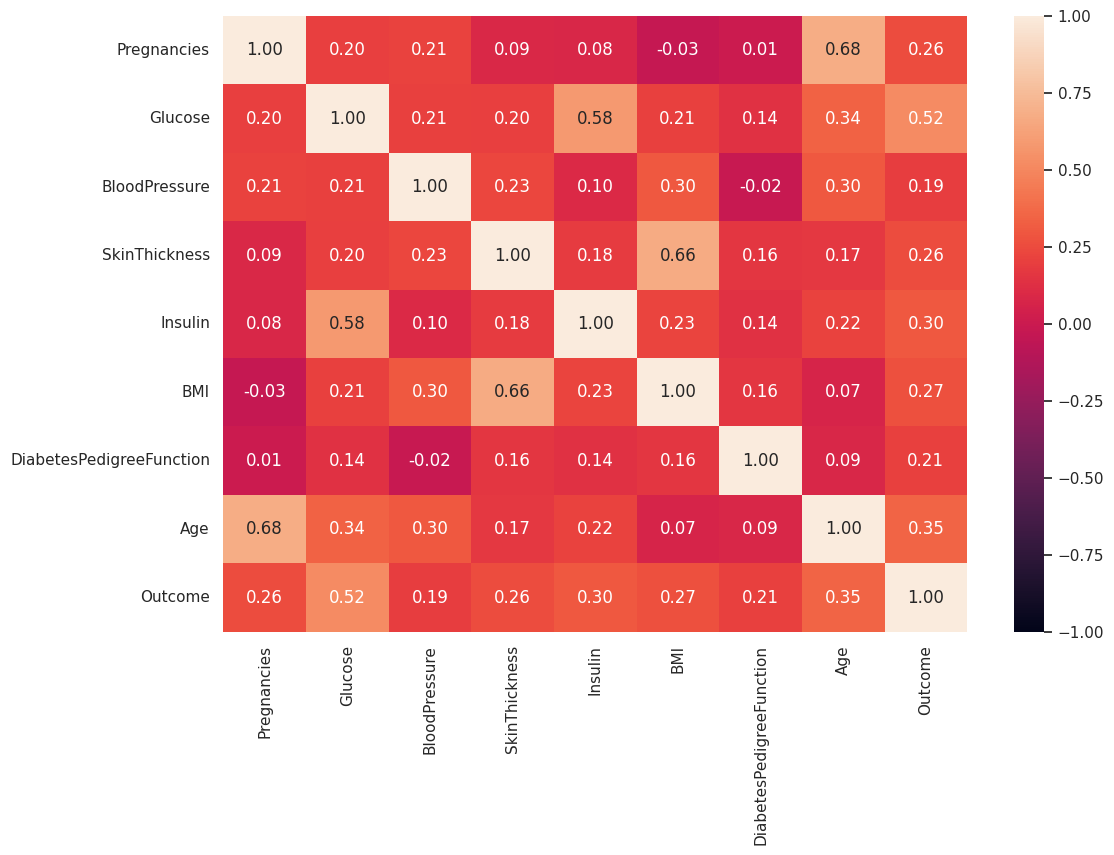

In [10]:
# heatmap of the correlation matrix
f = plt.figure(figsize=(12, 8))
sb.heatmap(cleannumeric_data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7755102040816326

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7040816326530612



<AxesSubplot: >

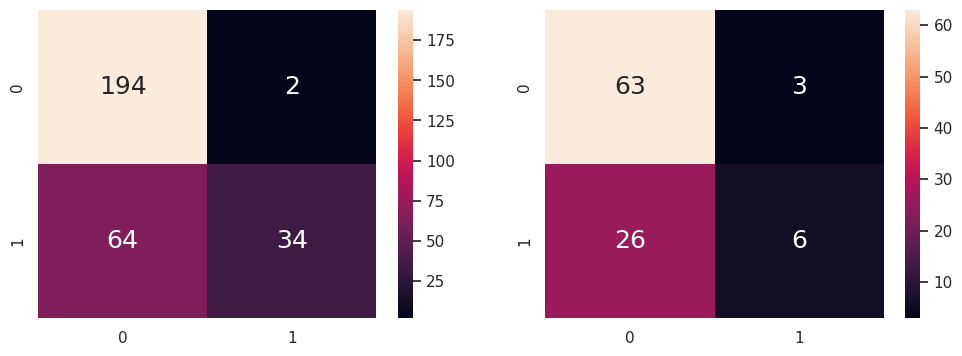

In [11]:
# import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# extracting response and predictor variables
y = pd.DataFrame(cleannumeric_data['Outcome'])
X = pd.DataFrame(cleannumeric_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]) 

# split dataset randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# decision tree using Train data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

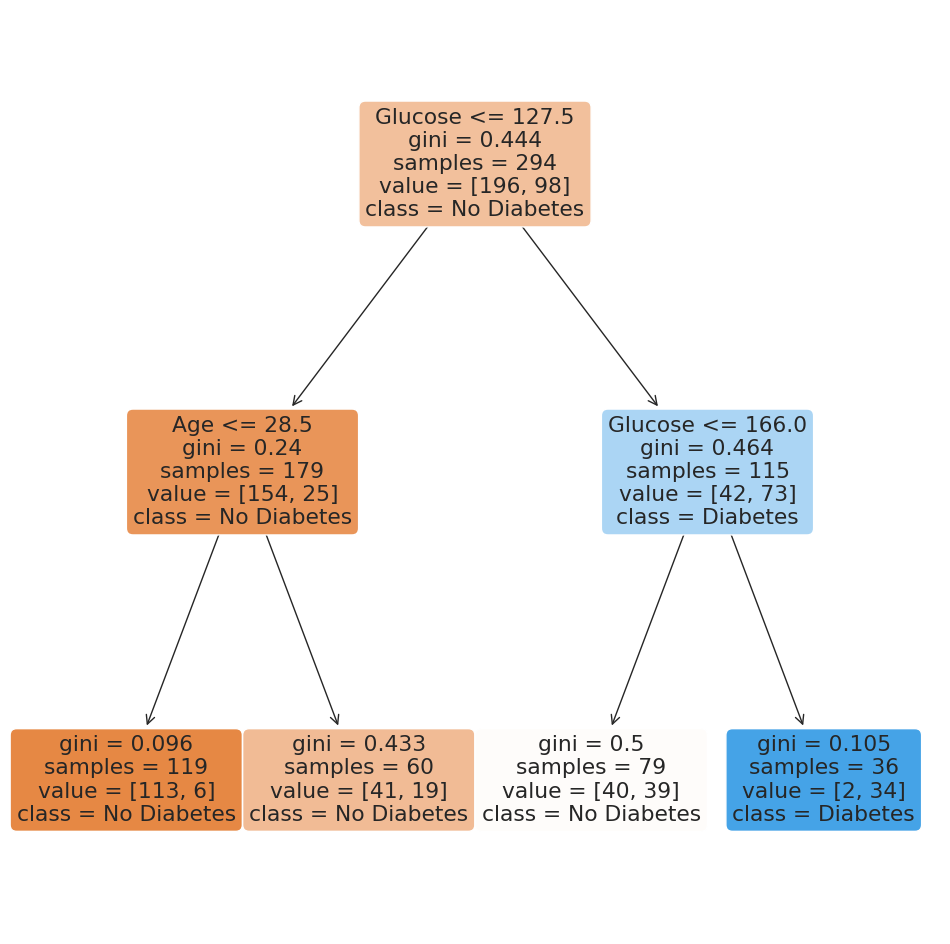

In [12]:
# plotting trained decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), #Convert Index to List
          class_names=["No Diabetes", "Diabetes"])
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8843537414965986

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7551020408163265



<AxesSubplot: >

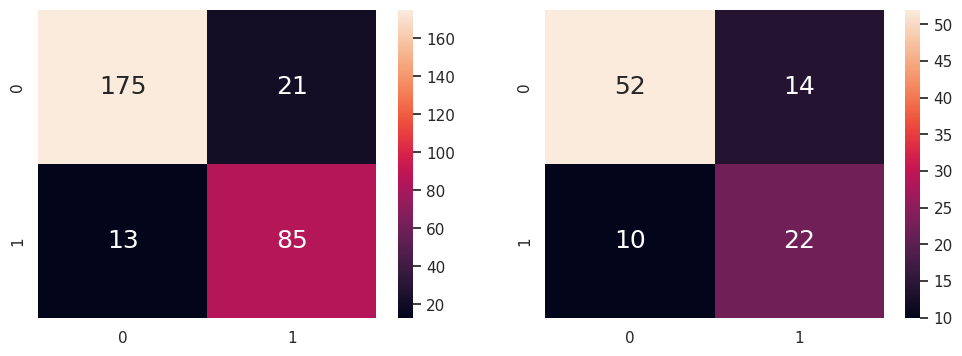

In [13]:
# do the same thing but increase depth to 4
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

predictors = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

y = pd.DataFrame(cleannumeric_data['Outcome'])
X = pd.DataFrame(cleannumeric_data[predictors]) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.5431034482758621, 0.9, 'Glucose <= 127.5\ngini = 0.444\nsamples = 294\nvalue = [196, 98]\nclass = No Diabetes'),
 Text(0.27586206896551724, 0.7, 'Age <= 28.5\ngini = 0.24\nsamples = 179\nvalue = [154, 25]\nclass = No Diabetes'),
 Text(0.13793103448275862, 0.5, 'BMI <= 45.4\ngini = 0.096\nsamples = 119\nvalue = [113, 6]\nclass = No Diabetes'),
 Text(0.06896551724137931, 0.3, 'SkinThickness <= 31.5\ngini = 0.082\nsamples = 117\nvalue = [112, 5]\nclass = No Diabetes'),
 Text(0.034482758620689655, 0.1, 'gini = 0.024\nsamples = 83\nvalue = [82, 1]\nclass = No Diabetes'),
 Text(0.10344827586206896, 0.1, 'gini = 0.208\nsamples = 34\nvalue = [30, 4]\nclass = No Diabetes'),
 Text(0.20689655172413793, 0.3, 'SkinThickness <= 35.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No Diabetes'),
 Text(0.1724137931034483, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No Diabetes'),
 Text(0.2413793103448276, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Diabetes'),
 Text(0.4

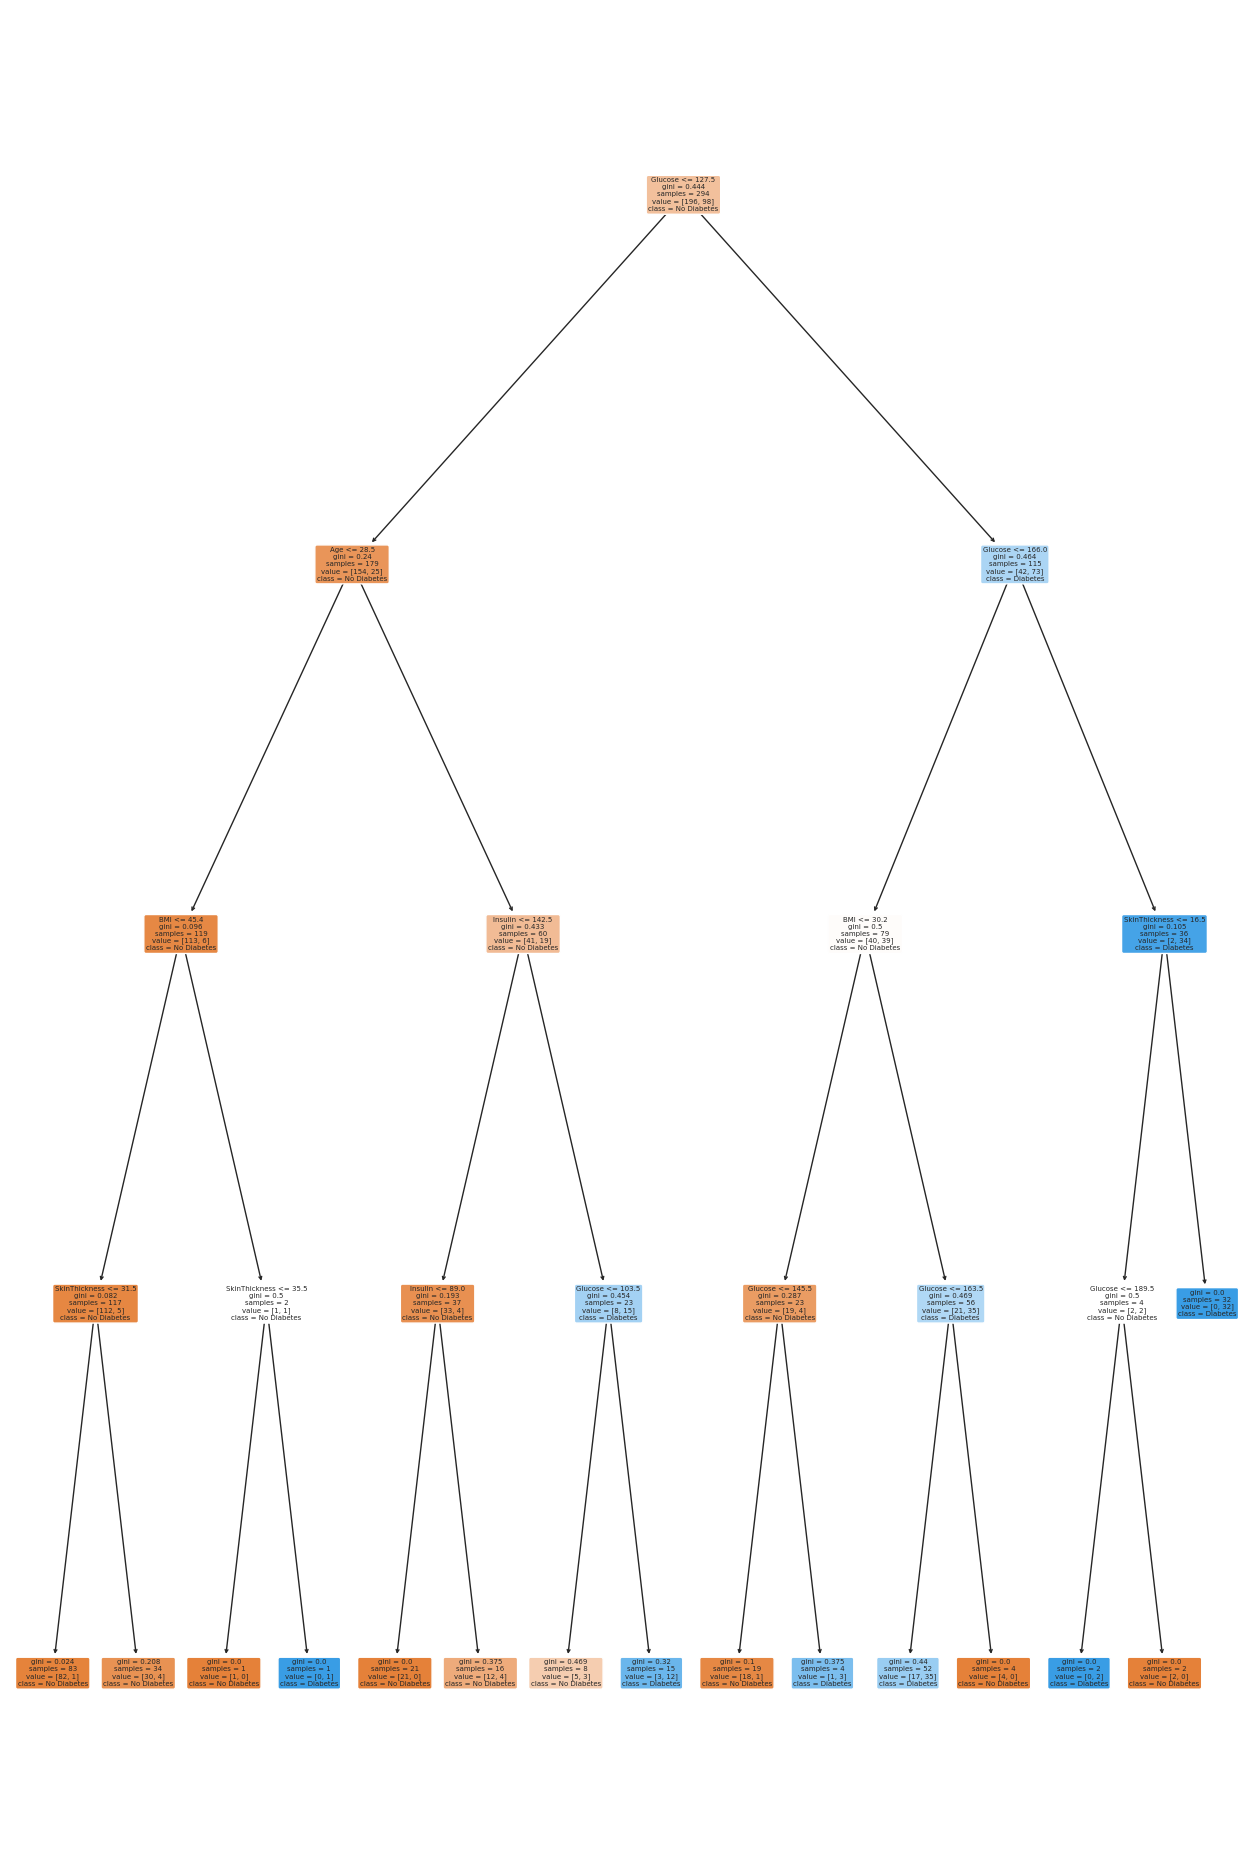

In [14]:
# plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(16,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=["No Diabetes","Diabetes"])

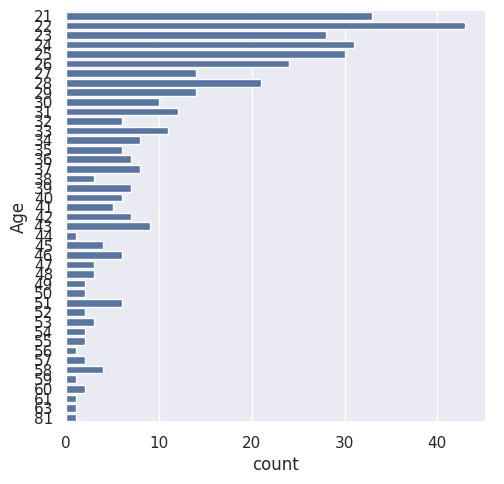

In [15]:
# Calculate number of data in each age
sb.catplot(y = "Age", data = cleannumeric_data, kind = "count")

In [16]:
def categorize_age(age):
    if age <= 30:
        return '20-30'
    elif age <= 40:
        return '31-40'
    elif age <= 50:
        return '41-50'
    elif age <= 60:
        return '51-60'
    else:
        return '61+'

# If cleannumeric_data was derived from another DataFrame and may be a copy
cleannumeric_data = cleannumeric_data.copy()
cleannumeric_data['Age_Group'] = cleannumeric_data['Age'].apply(categorize_age)

Analysis for Age Group 20-30


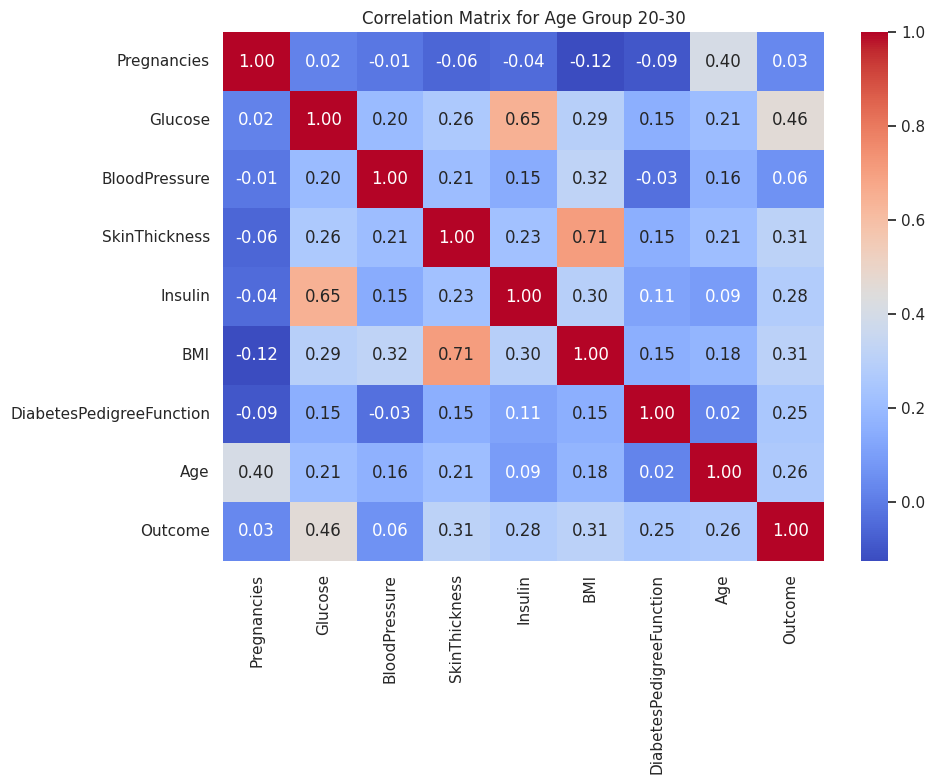

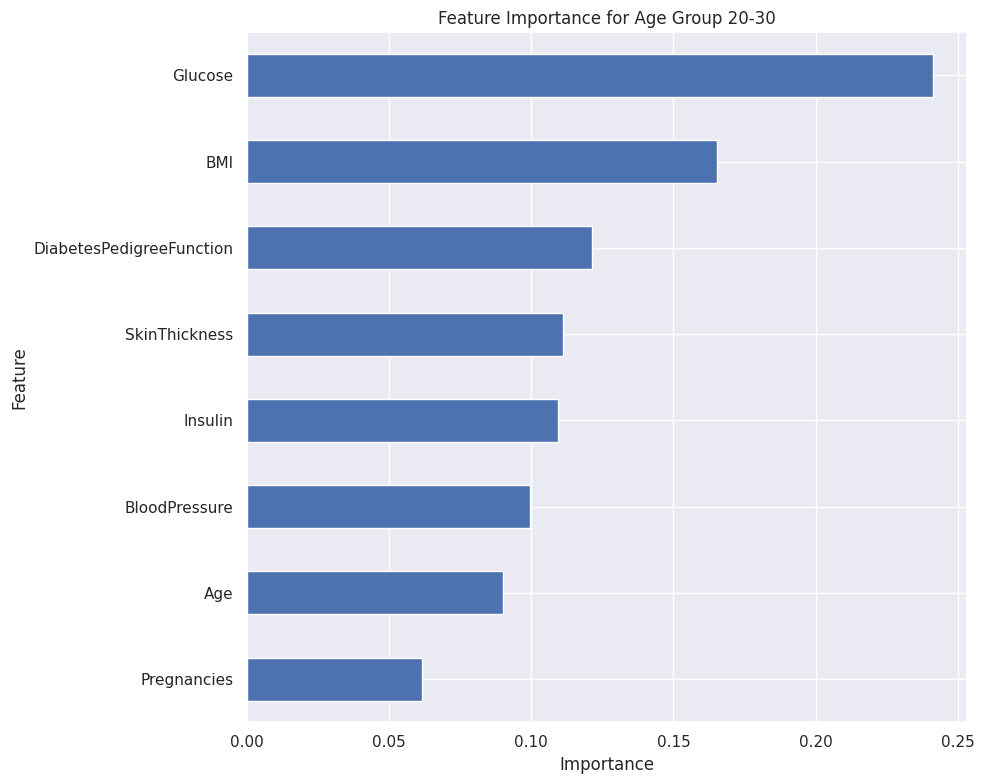

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

age_group = '20-30'

print(f"Analysis for Age Group {age_group}")

age_group_data = cleannumeric_data[cleannumeric_data['Age_Group'] == age_group]


# exclude non-numerical columns before computing the correlation
numerical_data = age_group_data.select_dtypes(include=[np.number])
    
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title(f'Correlation Matrix for Age Group {age_group}')
plt.tight_layout() 
plt.show()

# feature importance
X = numerical_data.drop(['Outcome'], axis=1)
y = age_group_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
    
importances = model.feature_importances_
features = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=True)

features.set_index('Feature', inplace=True)
features['Importance'].plot(kind='barh', figsize=(10, 8))
plt.title(f'Feature Importance for Age Group {age_group}')
plt.xlabel('Importance')
plt.tight_layout()  
plt.show()



Analysis for Age Group 20-30


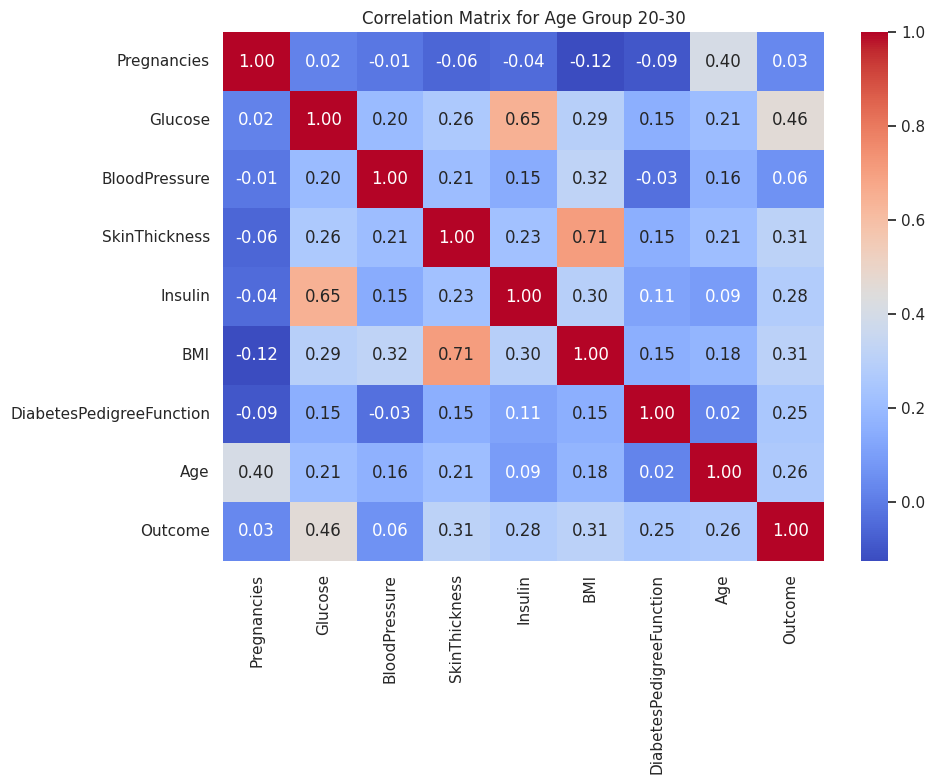

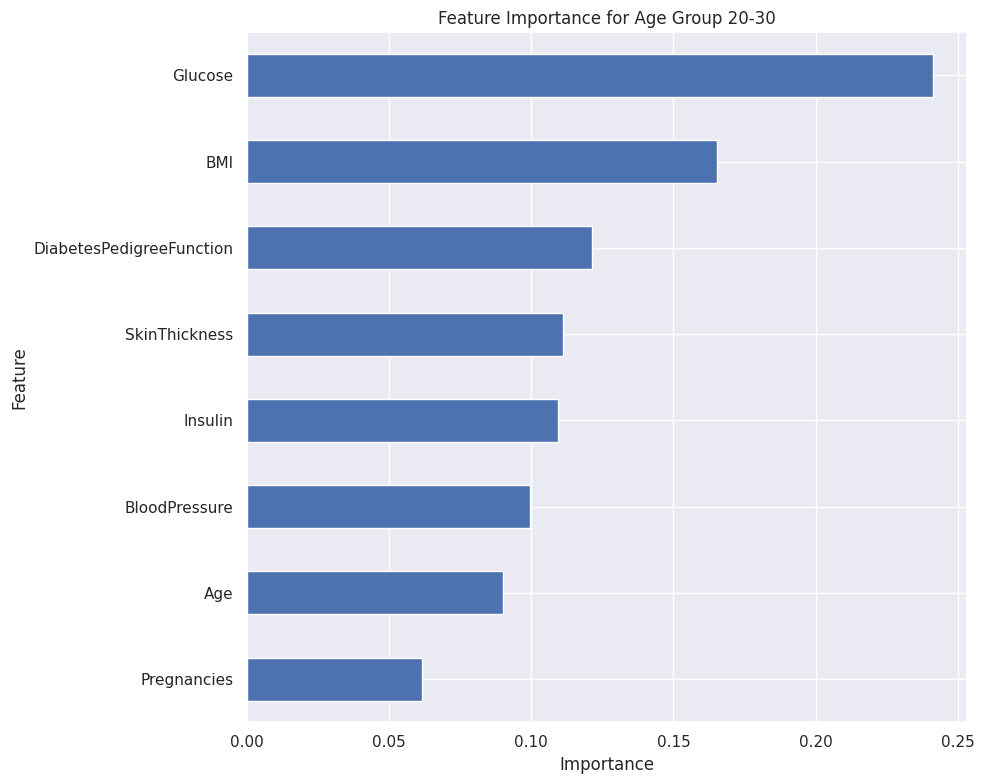

Analysis for Age Group 31-40


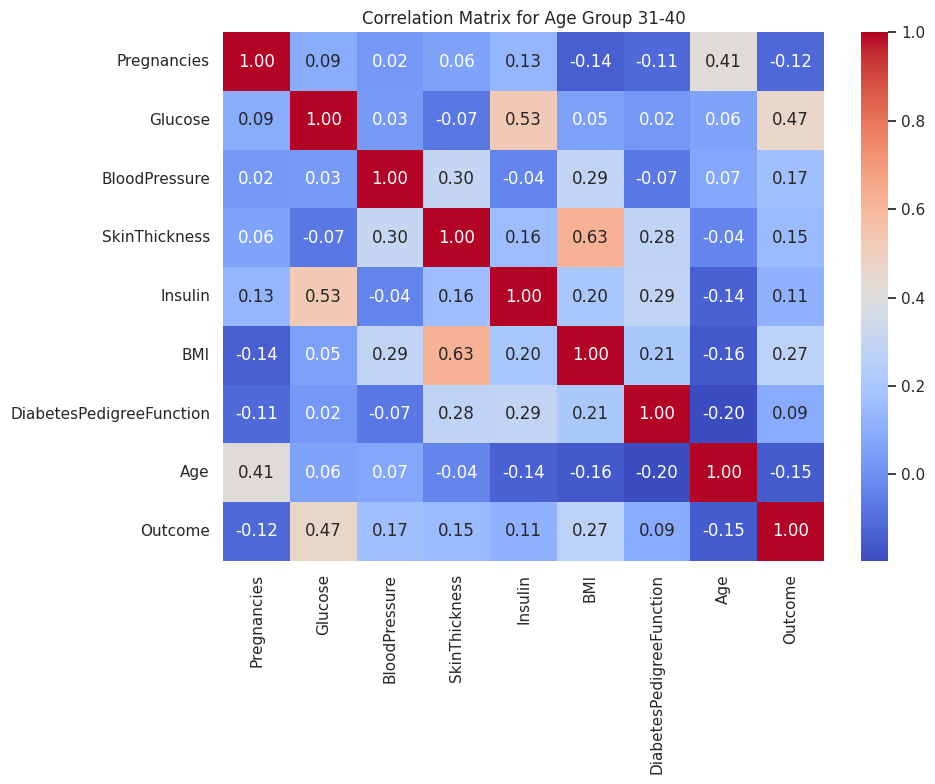

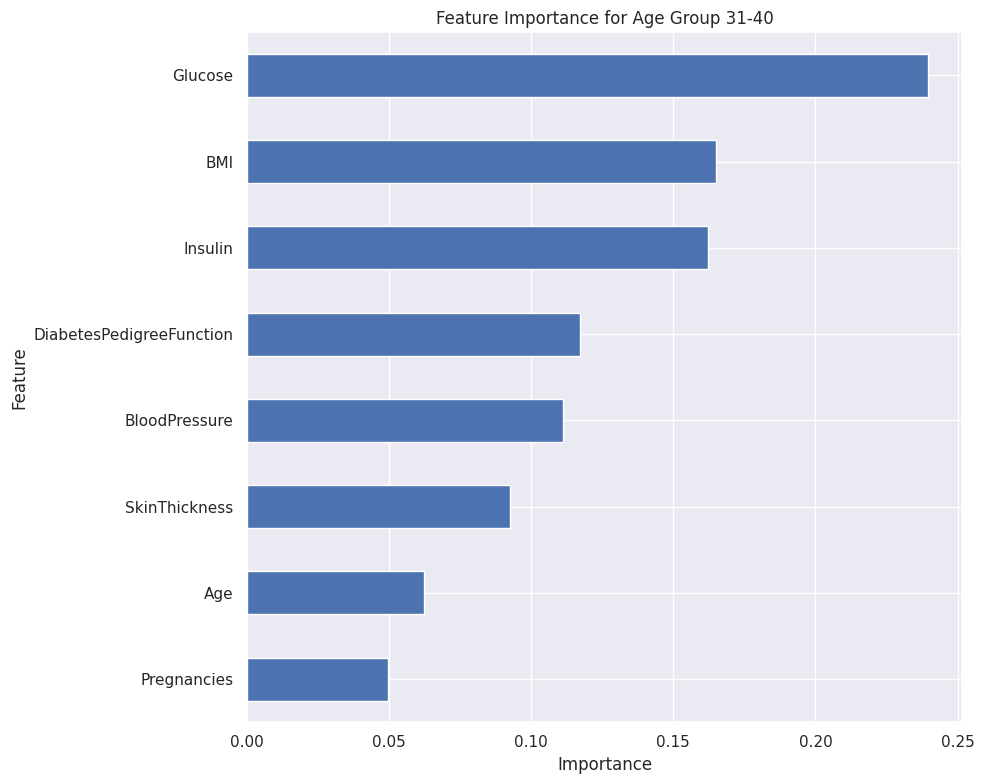

Analysis for Age Group 41-50


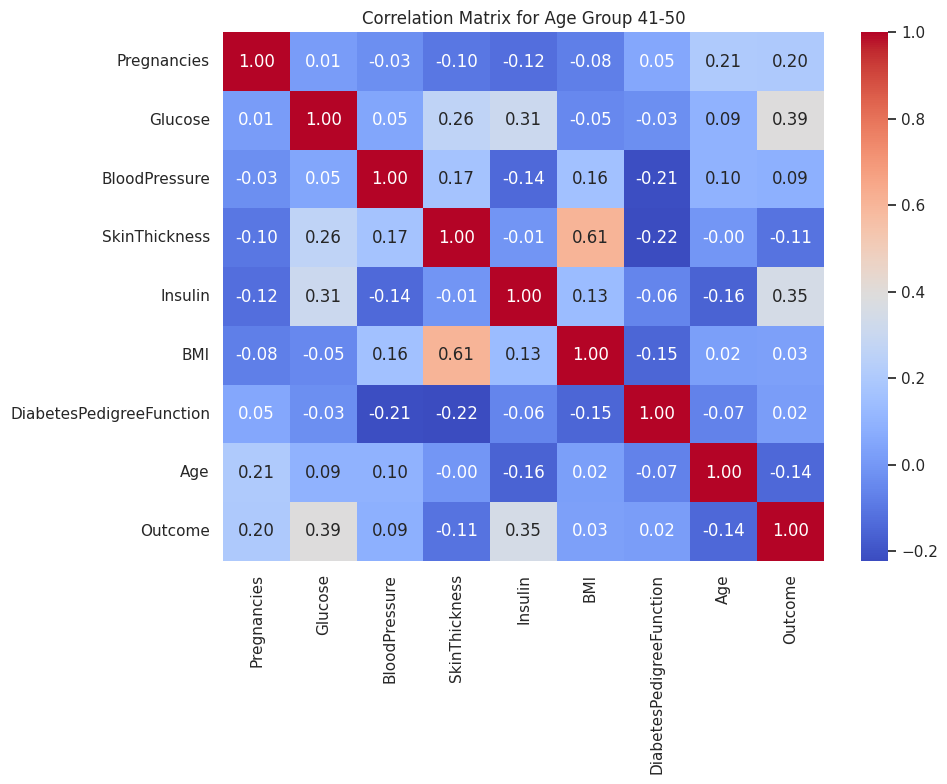

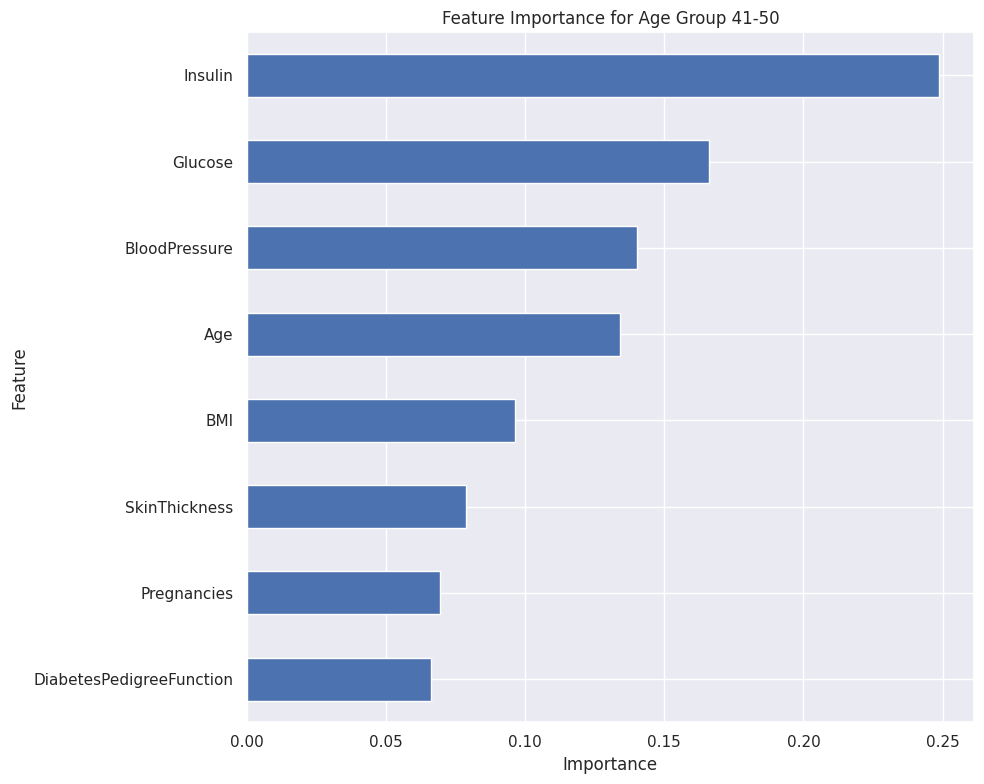

Analysis for Age Group 51-60


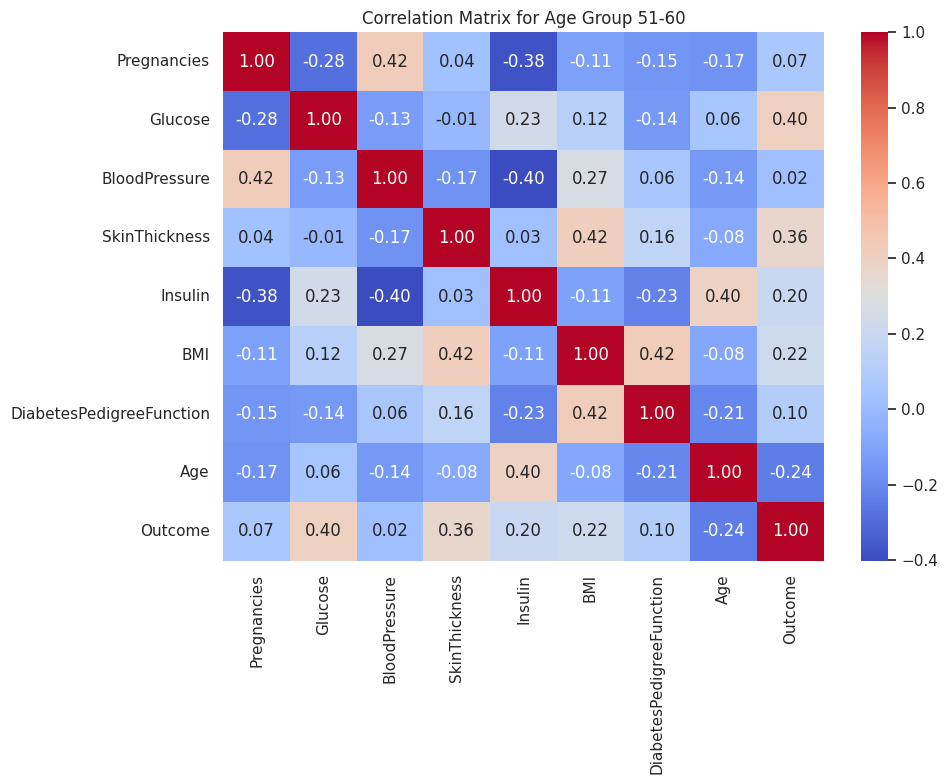

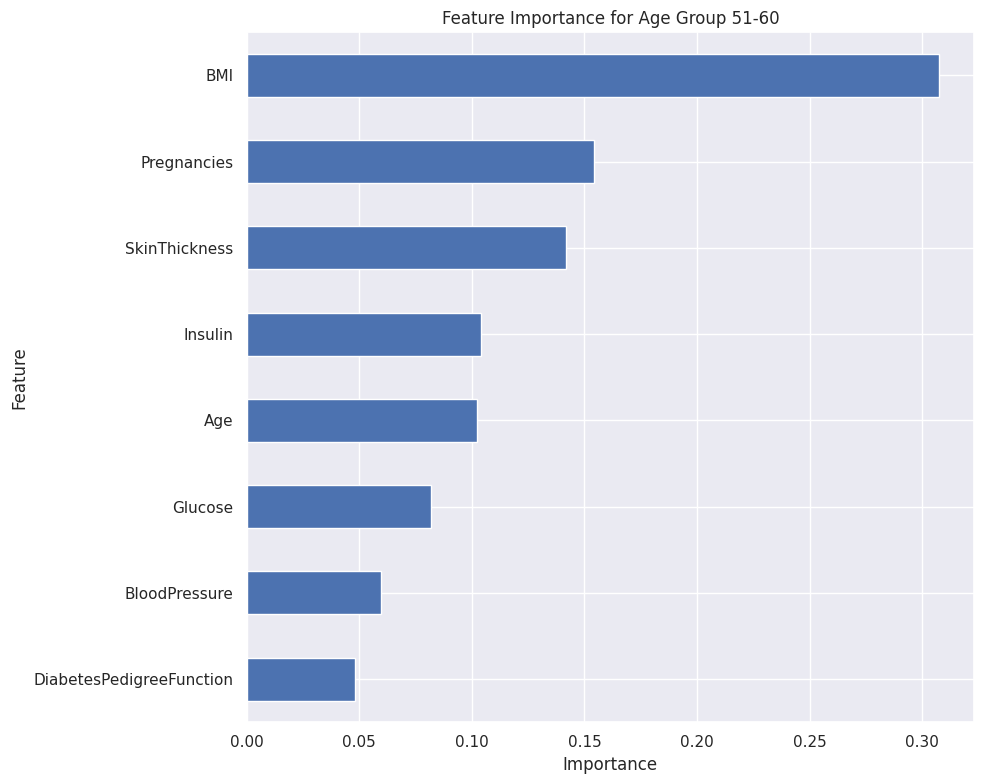

Analysis for Age Group 61+


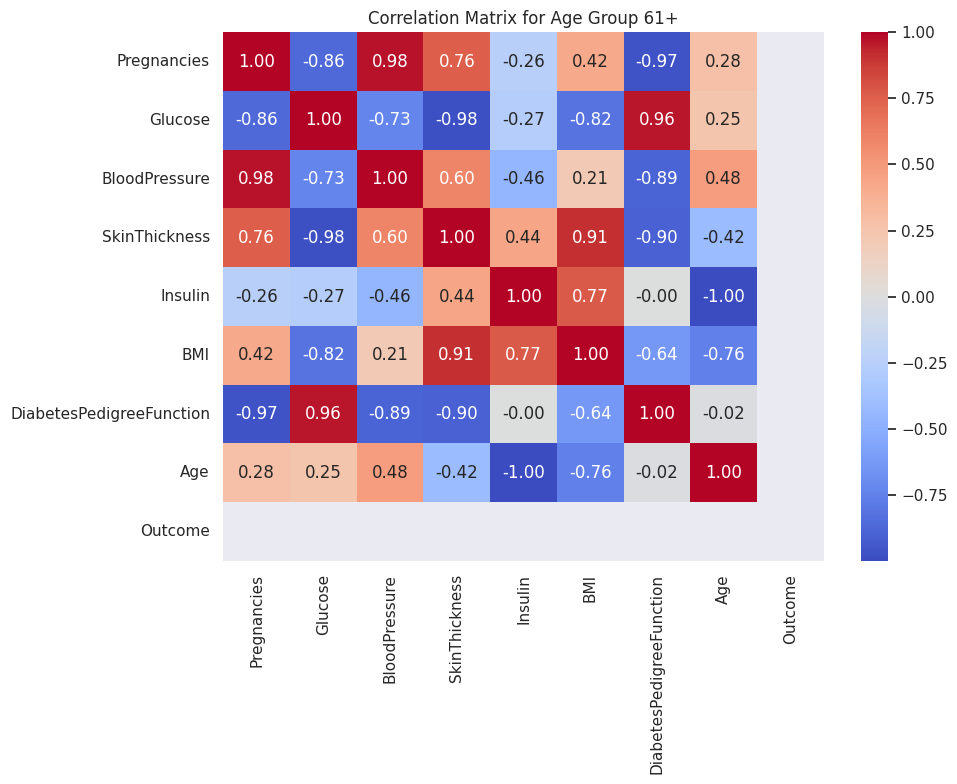

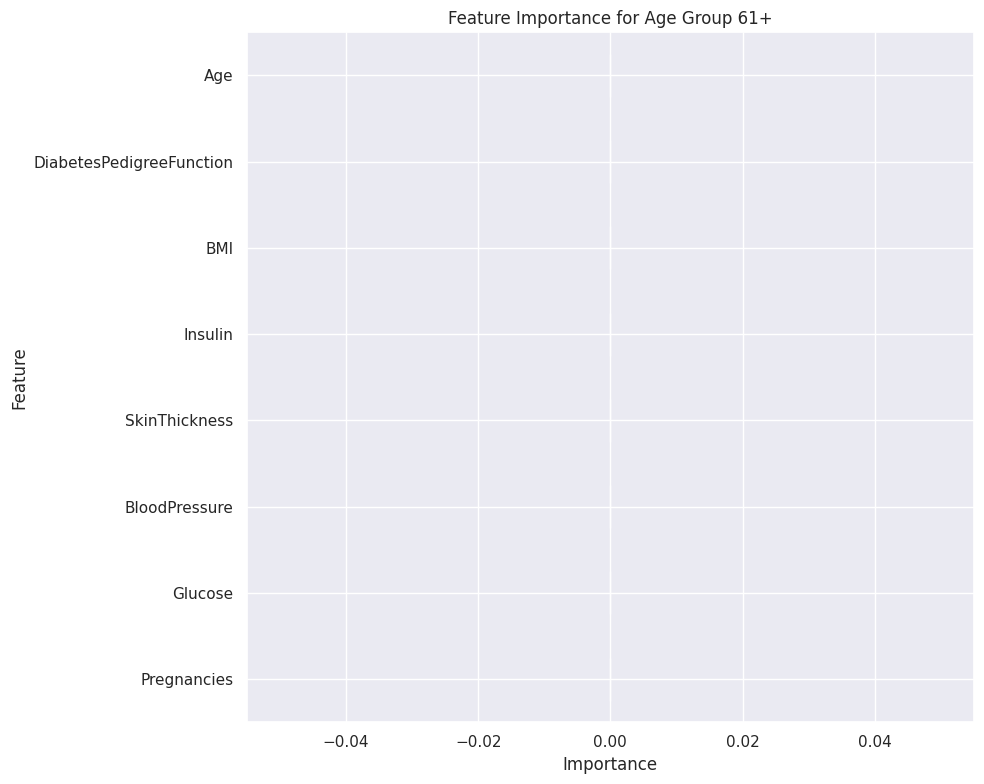

In [18]:
# Define age groups
age_groups = ['20-30', '31-40', '41-50', '51-60', '61+']

for age_group in age_groups:
    print(f"Analysis for Age Group {age_group}")
    
    age_group_data = cleannumeric_data[cleannumeric_data['Age_Group'] == age_group]

    if not age_group_data.empty:
        # Exclude non-numerical columns
        numerical_data = age_group_data.select_dtypes(include=[np.number])
        
        # Correlation matrix
        correlation_matrix = numerical_data.corr()
        plt.figure(figsize=(10, 8))
        sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
        plt.title(f'Correlation Matrix for Age Group {age_group}')
        plt.tight_layout()  
        plt.show()

        # Feature importance
        X = numerical_data.drop(['Outcome'], axis=1)
        y = age_group_data['Outcome']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        
        importances = model.feature_importances_
        features = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=True)

        features.set_index('Feature', inplace=True)
        features['Importance'].plot(kind='barh', figsize=(10, 8))
        plt.title(f'Feature Importance for Age Group {age_group}')
        plt.xlabel('Importance')
        plt.tight_layout() 
        plt.show()
    else:
        print(f"No data available for Age Group {age_group}")


Analysis for Age Group 20-30


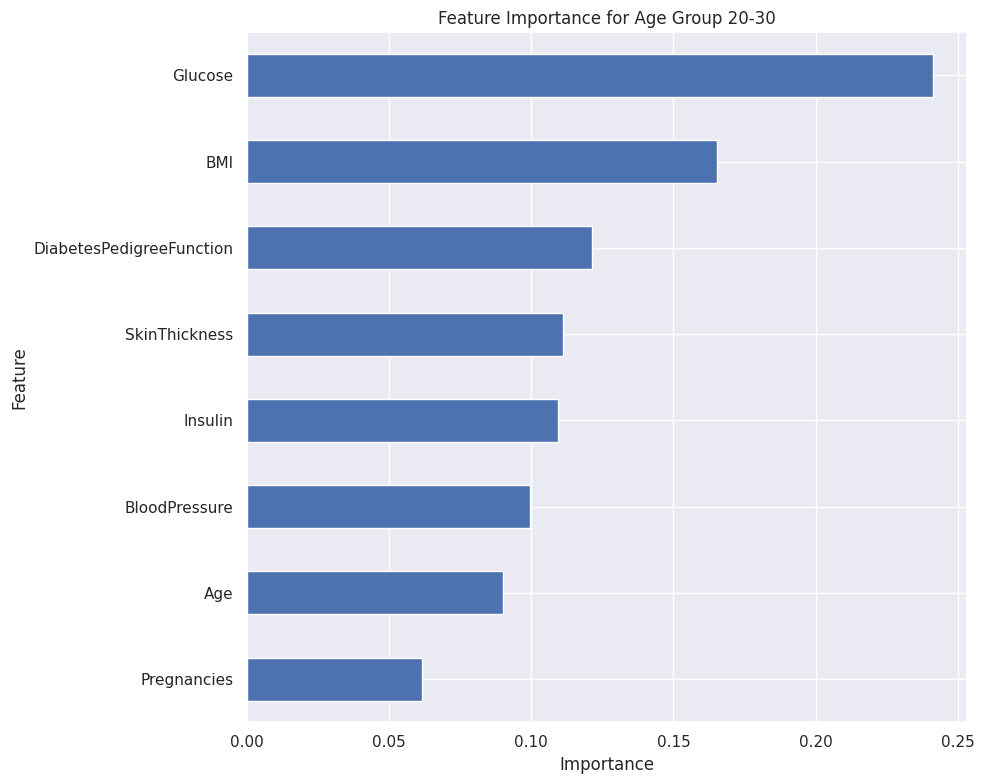

Analysis for Age Group 31-40


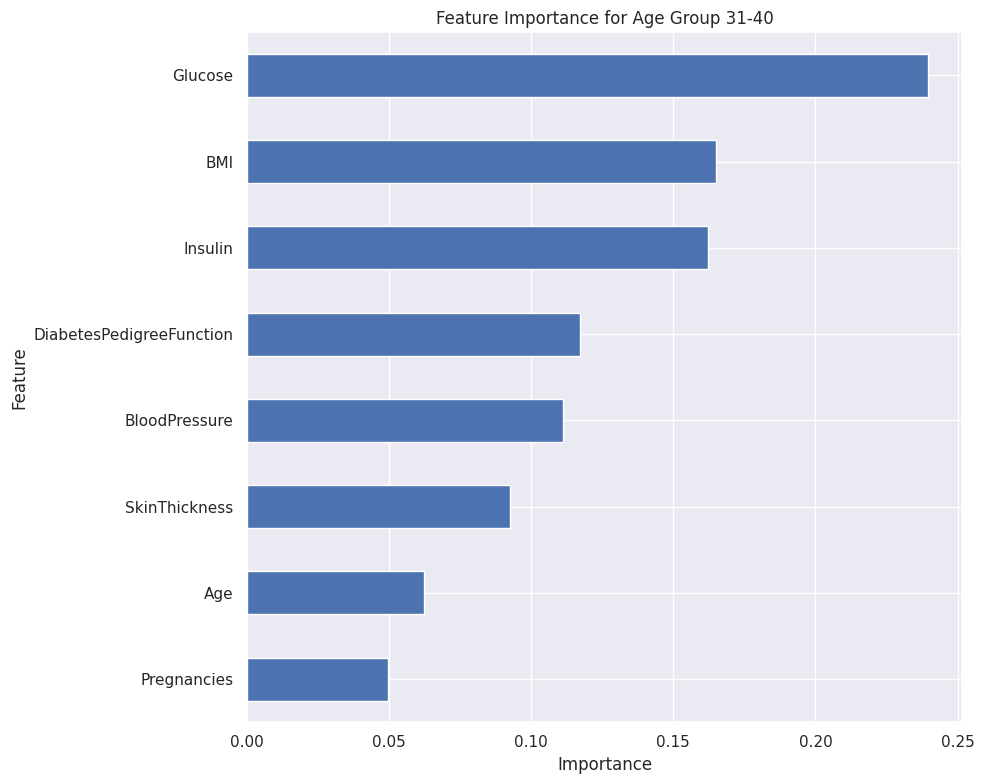

Analysis for Age Group 41-50


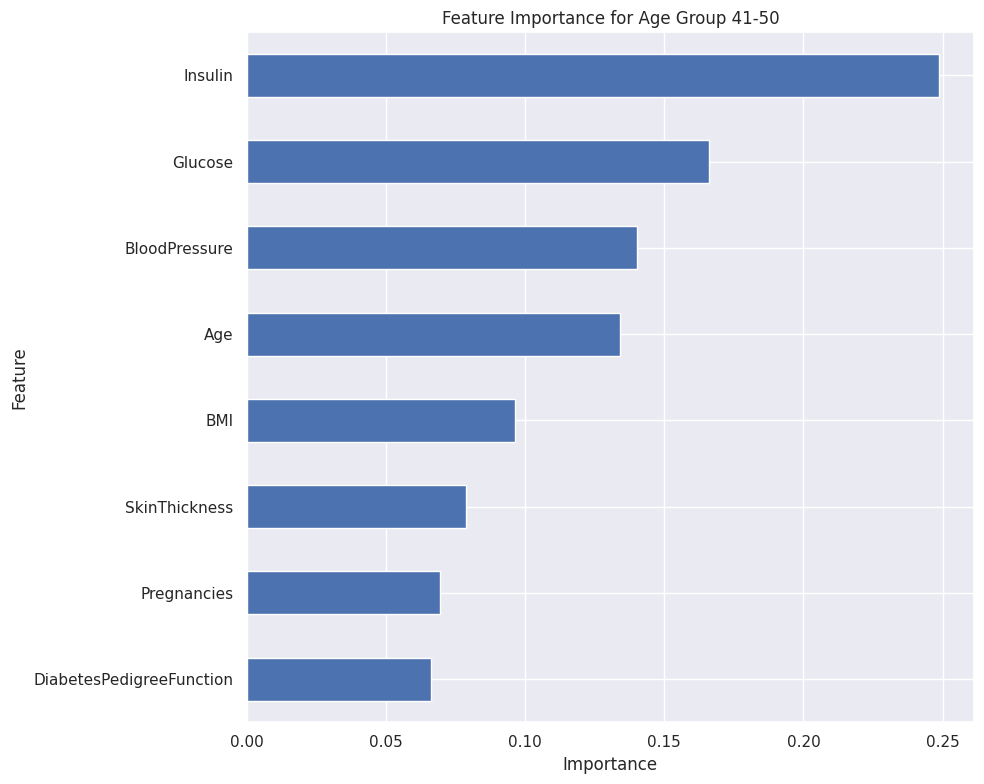

Analysis for Age Group 51-60


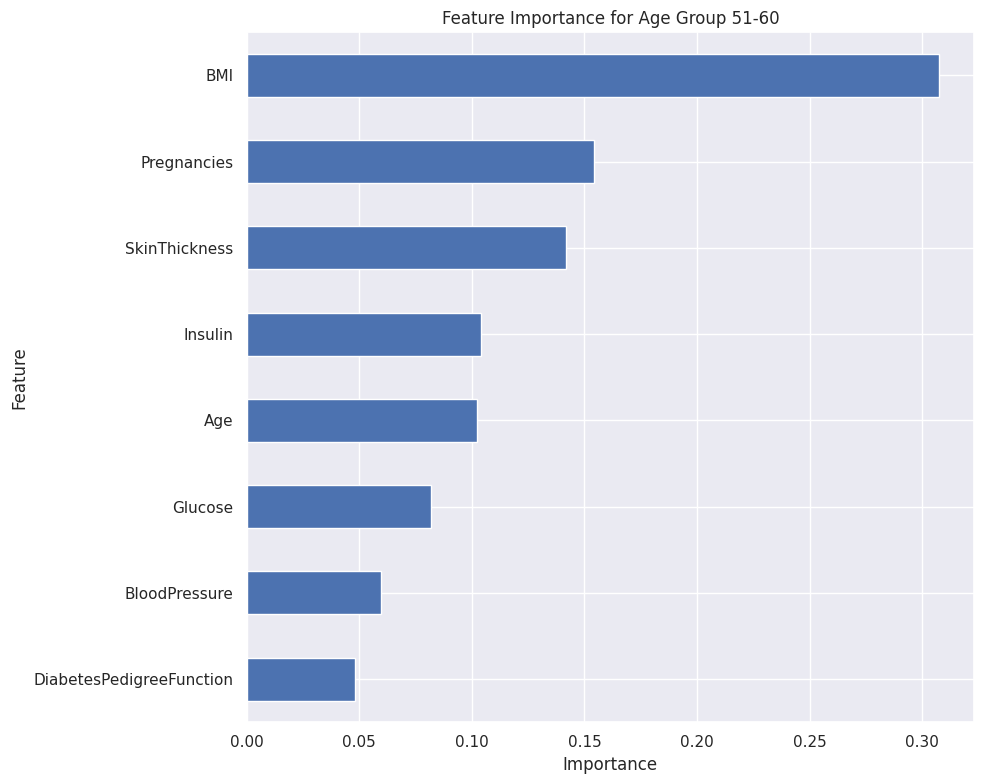

Analysis for Age Group 61+


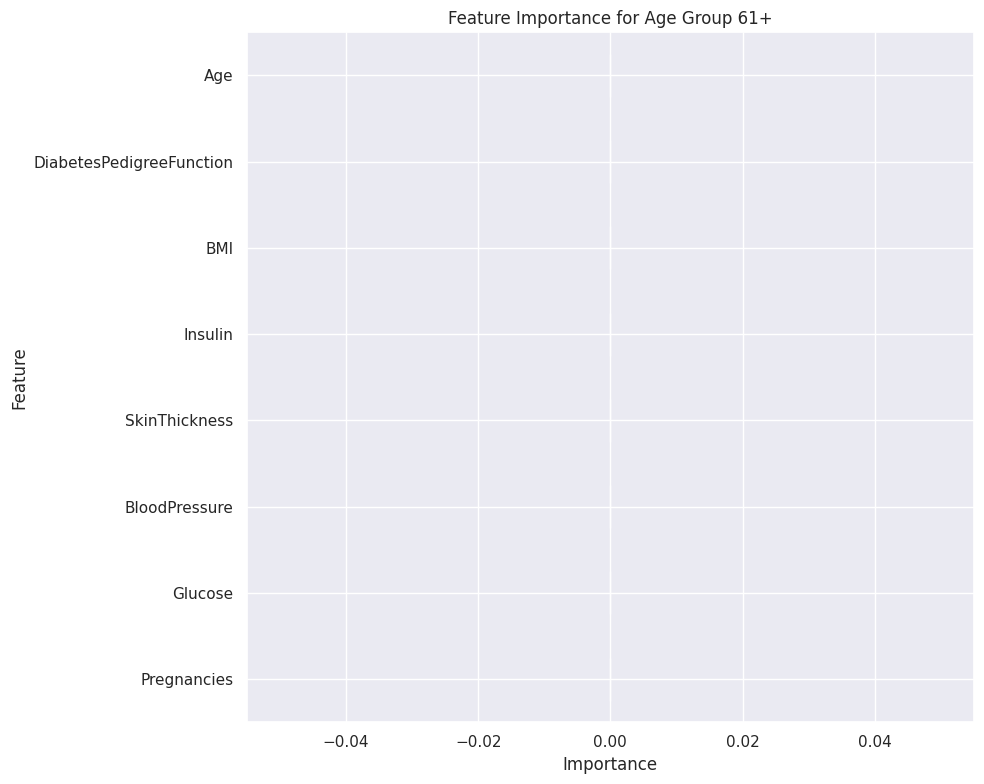

In [19]:
for age_group in age_groups:
    print(f"Analysis for Age Group {age_group}")
    
    age_group_data = cleannumeric_data[cleannumeric_data['Age_Group'] == age_group]

    if not age_group_data.empty:
        # Exclude non-numerical columns
        numerical_data = age_group_data.select_dtypes(include=[np.number])
        
        # Feature importance
        X = numerical_data.drop(['Outcome'], axis=1)
        y = age_group_data['Outcome']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        
        importances = model.feature_importances_
        features = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=True)

        features.set_index('Feature', inplace=True)
        features['Importance'].plot(kind='barh', figsize=(10, 8))
        plt.title(f'Feature Importance for Age Group {age_group}')
        plt.xlabel('Importance')
        plt.tight_layout() 
        plt.show()
    else:
        print(f"No data available for Age Group {age_group}")


In [20]:
print(f"Number of samples in {'61+'} group: {age_group_data.shape[0]}")

Number of samples in 61+ group: 3


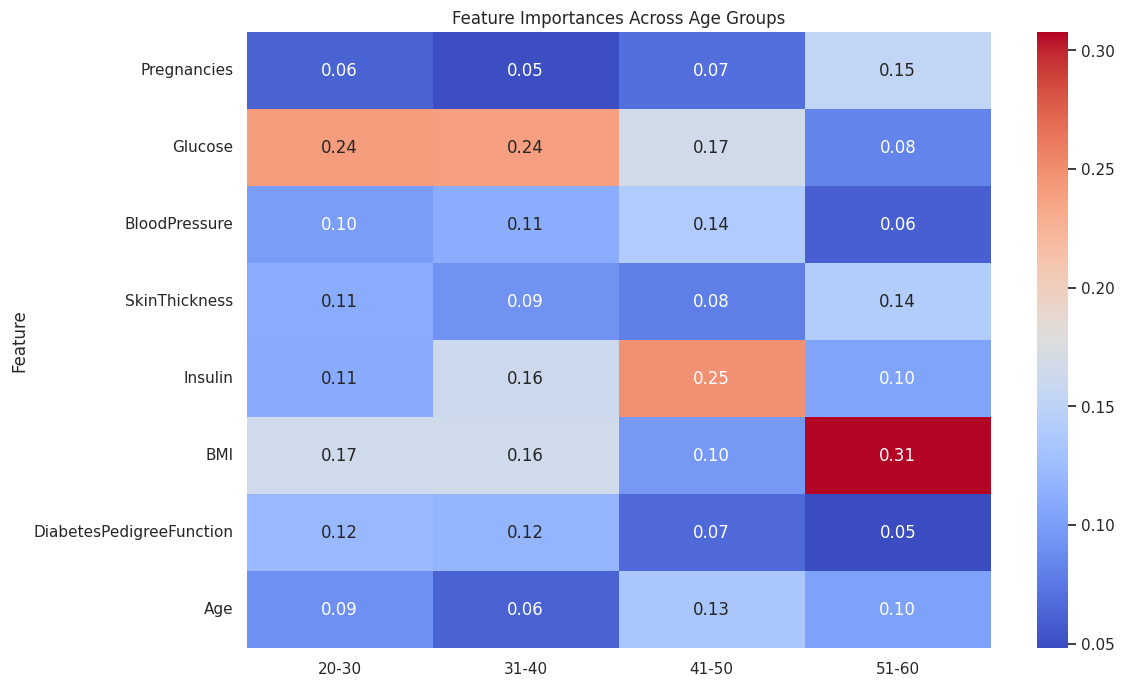

In [21]:
# dataFrame to hold all feature importances
feature_importances = pd.DataFrame()

# redefine age groups (removing '61+')
age_groups = ['20-30', '31-40', '41-50', '51-60']

for age_group in age_groups:
    age_group_data = cleannumeric_data[cleannumeric_data['Age_Group'] == age_group]
    if not age_group_data.empty:
        numerical_data = age_group_data.select_dtypes(include=[np.number])
        X = numerical_data.drop(['Outcome'], axis=1)
        y = age_group_data['Outcome']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        
        # Store feature importances
        importances = model.feature_importances_
        temp_df = pd.DataFrame({'Feature': X.columns, age_group: importances})
        
        if feature_importances.empty:
            feature_importances = temp_df
        else:
            feature_importances = feature_importances.merge(temp_df, on='Feature')

feature_importances.set_index('Feature', inplace=True)

# present findings in the heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(feature_importances, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Importances Across Age Groups')
plt.show()


<Figure size 1400x800 with 0 Axes>

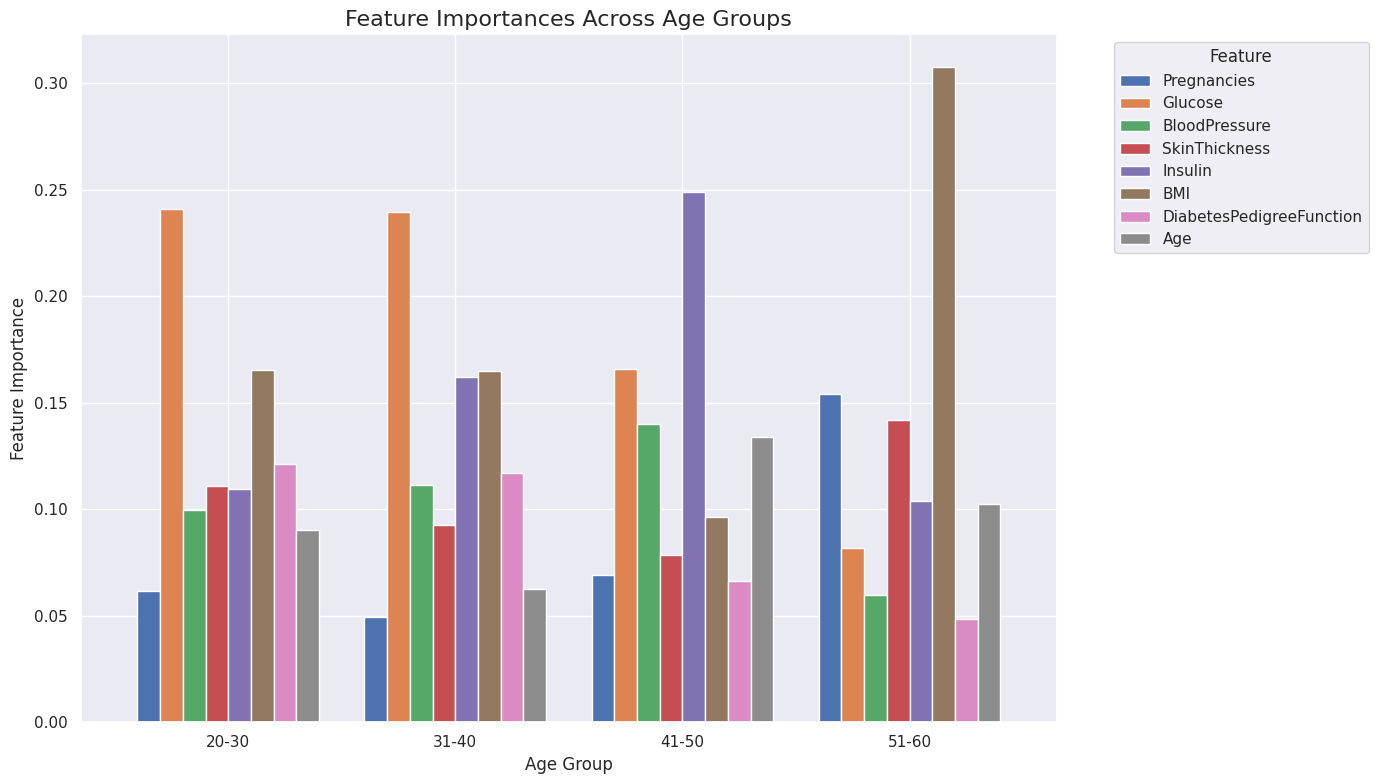

In [22]:
plt.figure(figsize=(14, 8))

# plot the feature importances as a bar graph
ax = feature_importances.T.plot(kind='bar', width=0.8, figsize=(14, 8))

ax.set_title('Feature Importances Across Age Groups', fontsize=16)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Feature Importance', fontsize=12)

# Rotate the x-axis labels
plt.xticks(rotation=0)

plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=80d11a34-add6-4fbd-8ee2-bf8d80ece3f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>